<a href="https://colab.research.google.com/github/SRegaard/Workshop-1./blob/main/Test_til_bp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!git clone https://github.com/SRegaard/BP2.git

fatal: destination path 'BP2' already exists and is not an empty directory.


In [23]:
# 📌 1. Klon dit GitHub-repo (kun første gang – spring over ved genstart)
!git clone https://github.com/SRegaard/BP2.git || echo "Repo already cloned"

# 📌 2. Installer nødvendige pakker
!pip install beautifulsoup4 lxml nltk networkx matplotlib

# 📌 3. Importér biblioteker
import os
from bs4 import BeautifulSoup
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

# 📌 4. Download nødvendige NLTK-data
nltk.download('punkt')
nltk.download('stopwords')

fatal: destination path 'BP2' already exists and is not an empty directory.
Repo already cloned


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

🔍 Behandler fil: Facebook (28_04_2025 09.09.36).html
✅ Antal ord efter stopordsfiltrering: 694


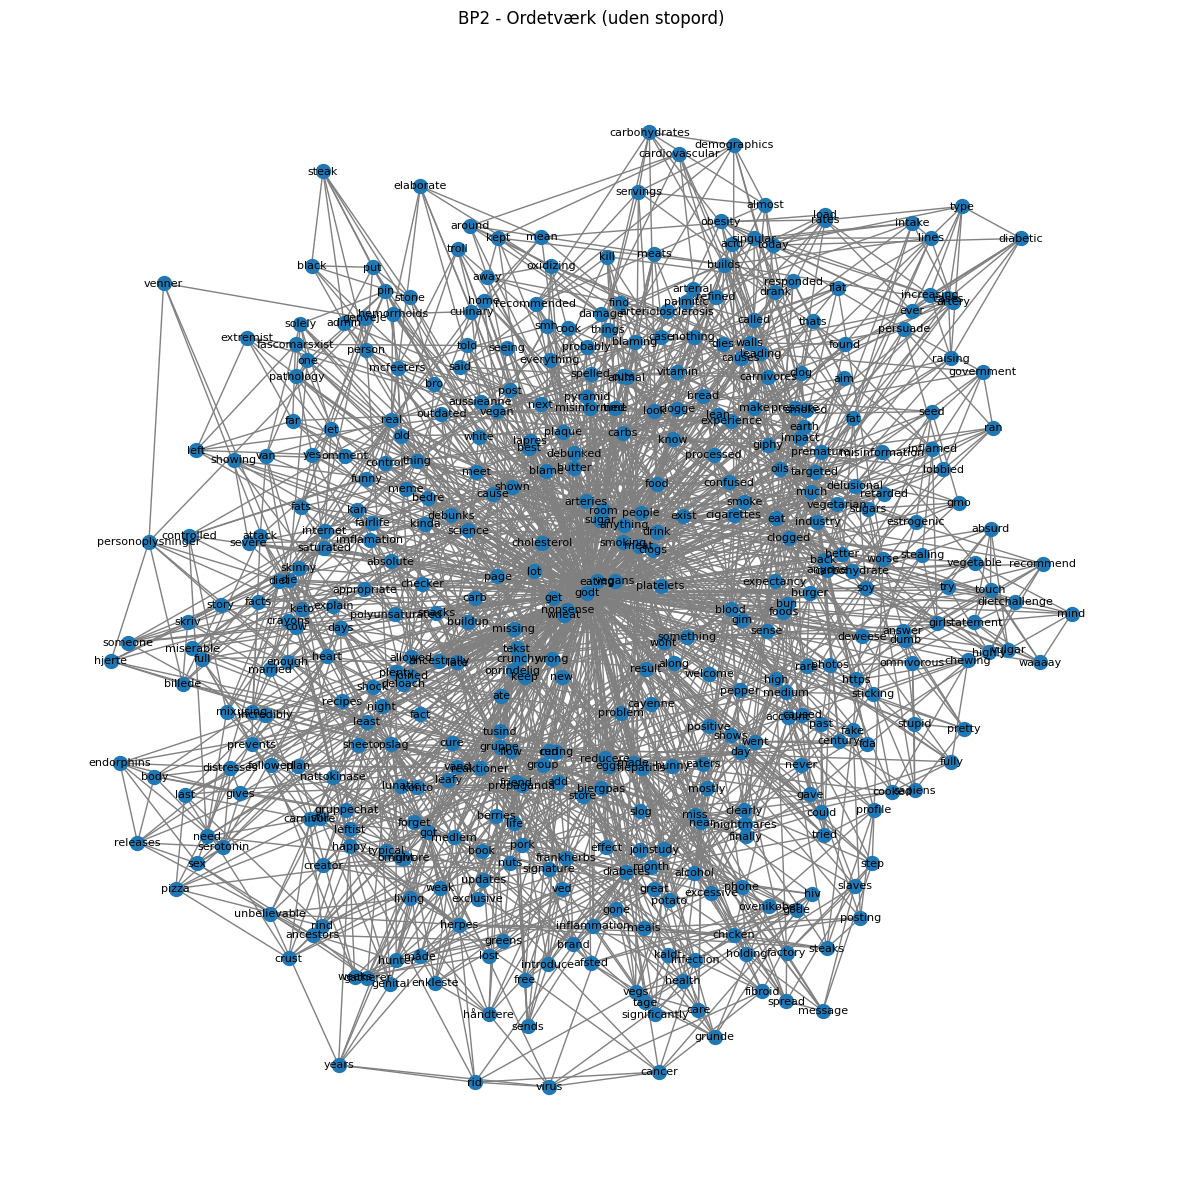

In [26]:
# 📌 5. Funktioner (med robust tokenizer + stopord på både dansk og engelsk)
tokenizer = TreebankWordTokenizer()

# Egne interface-ord fra Facebooks feed
interface_ord = {
    # Engelske interface-ord
    'like', 'likes', 'comment', 'comments', 'share', 'shares',
    'watch', 'views', 'follow', 'followers', 'following',
    'click', 'see', 'more', 'reply', 'others', 'see more', 'videos','settings','notifications'

    # Danske oversættelser
    'synes', 'synes godt om', 'kommentar', 'kommentarer', 'del', 'delinger',
    'se', 'visninger', 'følg', 'følger', 'følgere',
    'klik', 'mere', 'svar', 'andre', 'se mere', 'videoer', 'indstillinger','notifikationer','oversæt','oversættelse',

    #Reaktioner
    'aha', 'haha', 'lol', 'yay', 'hmm', 'huh', 'wow', 'omg', 'wtf', 'uff', 'øh', 'øv'
}

# Kombiner stopord: dansk, engelsk + interface
stopord = (set(stopwords.words('danish')) |
           set(stopwords.words('english')) |
           interface_ord)

def rens_og_tokeniser(tekst):
    tokens = tokenizer.tokenize(tekst)
    tokens = [ord for ord in tokens if ord.isalpha()]
    tokens = [ord.lower() for ord in tokens if not ord.istitle() and ord.lower() not in stopord]
    tokens = [ord for ord in tokens if len(ord) > 2]
    return tokens

def byg_ordnetvaerk(tokens, vindue=5):
    edges = defaultdict(int)
    for i in range(len(tokens) - vindue):
        vindue_ord = tokens[i:i+vindue]
        for i in range(len(vindue_ord)):
            for j in range(i+1, len(vindue_ord)):
                if vindue_ord[i] != vindue_ord[j]:
                    edges[(vindue_ord[i], vindue_ord[j])] += 1
    G = nx.Graph()
    for (ord1, ord2), vægt in edges.items():
        G.add_edge(ord1, ord2, weight=vægt)
    return G

def visualiser_netvaerk(G, titel="Ordetværk"):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx(G, pos, with_labels=True, node_size=100, font_size=8, edge_color='gray')
    plt.title(titel)
    plt.axis('off')
    plt.show()

# 📌 6. Sti til dine HTML-filer i repoet
mappe_sti = "/content/BP2"

# 📌 7. Behandl alle HTML-filer
alle_tokens = []

for filnavn in os.listdir(mappe_sti):
    if filnavn.endswith('.html'):
        print(f"🔍 Behandler fil: {filnavn}")
        filsti = os.path.join(mappe_sti, filnavn)
        tekst = udtraek_tekst_fra_html(filsti)
        tokens = rens_og_tokeniser(tekst)
        alle_tokens.extend(tokens)

print(f"✅ Antal ord efter stopordsfiltrering: {len(alle_tokens)}")

# 📌 8. Byg og vis ordnetværk
G = byg_ordnetvaerk(alle_tokens)
visualiser_netvaerk(G, titel="BP2 - Ordetværk (uden stopord)")